In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import svd, diagsvd
import random as rd

- Seleciona um valor que não seja 2.8 - avaliação real de um usuário
- Guarda esse valor
- Muda por um valor aleatório
- Decompõe a matriz A
- Apaga k valores da matriz sigma

- diagsvd(s, A.shape[0], A.shape[1]) ????????

- Recompõe a matriz A multiplicando u * s * vd
- Compara o valor calculado com o valor real
- Salva Quanto foi a diferença/erro

- Repete o processo 100 vezes

- Faz um gráfico

- Muda a quantidade k de valores que você apaga no final da matriz sigma

In [23]:
df = pd.read_csv('data/ratings_small.csv')
df.drop(['timestamp'], axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [24]:
A = df.pivot_table(index='userId', columns='movieId', values='rating').fillna(2.8)
# Preenche os valores NaN com 2.8 (Média, arredondada para uma casa decimal, entre 0.5 e 5, valores possíveis para rating)
A = A.to_numpy()
A

array([[2.8, 2.8, 2.8, ..., 2.8, 2.8, 2.8],
       [2.8, 2.8, 2.8, ..., 2.8, 2.8, 2.8],
       [2.8, 2.8, 2.8, ..., 2.8, 2.8, 2.8],
       ...,
       [2.8, 2.8, 2.8, ..., 2.8, 2.8, 2.8],
       [4. , 2.8, 2.8, ..., 2.8, 2.8, 2.8],
       [5. , 2.8, 2.8, ..., 2.8, 2.8, 2.8]])

In [26]:
posicoes_selecionadas = []
valores_selecionados = []
valores_gerados = []
valores_simulados = []

for i in range(0, 100):
    A_temp = A.copy()
    while True:
        # Seleciona uma posição aleatória na qual o valor não seja 2.8
        i = rd.randint(0, len(A) - 1)
        j = rd.randint(0, len(A[0]) - 1)
        if A_temp[i][j] != 2.8:
            break
    
    posicoes_selecionadas.append((i, j)) # Armazena a posição selecionada
    valores_selecionados.append(A_temp[i][j]) # Armazena o valor selecionado
    valor_gerado = max((rd.random() * rd.randint(1, 5)), 0.5) # Gera um valor de rating entre 0.5 e 5
    A_temp[i][j] = valor_gerado # Substitui o valor original pelo valor gerado
    valores_gerados.append(valor_gerado) # Armazena o valor gerado

    # Processo de remoção de ruído
    U, S, V = svd(A_temp)
    k = len(A)//2 # Número de valores singulares a serem apagados
    S[-k:] = k*[0] # Apaga os k últimos valores singulares
    A_simulado = U @ diagsvd(S, len(A), len(A[0])) @ V
    valores_simulados.append(A_simulado[i][j]) # Armazena o valor simulado
    




In [57]:
print("Posições selecionadas: ", posicoes_selecionadas)
print("Valores selecionados: ", valores_selecionados)
print("Valores gerados: ", valores_gerados)
print("Valores simulados: ", valores_simulados)
erros = [valores_simulados[i] - valores_selecionados[i] for i in range(0, 100)]
erros_absolutos = [abs(valores_selecionados[i] - valores_simulados[i]) for i in range(0, 100)]
print("Erros: ", erros)
print("Erros absolutos: ", erros_absolutos)
sum(erros_absolutos)/len(erros_absolutos) # Média dos erros absolutos

Posições selecionadas:  [(352, 6276), (332, 695), (528, 3043), (653, 314), (482, 6123), (2, 2599), (546, 1030), (337, 37), (576, 909), (118, 1871), (310, 955), (305, 2164), (451, 1975), (204, 8879), (253, 873), (60, 1645), (162, 406), (25, 7119), (663, 8339), (438, 1834), (532, 2161), (653, 1257), (452, 1564), (563, 261), (416, 1253), (546, 8634), (132, 2342), (536, 859), (471, 1763), (212, 6356), (244, 880), (504, 730), (357, 2048), (456, 8588), (29, 2361), (563, 2117), (218, 406), (438, 3581), (613, 1692), (653, 2746), (273, 263), (310, 1638), (14, 6171), (474, 2764), (546, 2038), (307, 129), (212, 7640), (53, 7238), (72, 8505), (441, 3973), (249, 7372), (504, 984), (429, 2346), (120, 494), (663, 5618), (535, 401), (293, 5141), (389, 702), (606, 5475), (472, 8262), (239, 4686), (149, 42), (546, 7008), (42, 470), (212, 4686), (546, 3745), (118, 1119), (381, 3058), (164, 5115), (623, 6778), (372, 48), (648, 283), (546, 302), (99, 5), (517, 654), (451, 1410), (221, 2939), (467, 2772), (

1.991543292609297

In [58]:
# Convertendo as listas em um DataFrame
df = pd.DataFrame({'Posições selecionadas': posicoes_selecionadas, 'Valores selecionados': valores_selecionados, 'Valores gerados': valores_gerados, 'Valores simulados': valores_simulados, 'Erros': erros, 'Erros absolutos': erros_absolutos})
df.to_csv('data/erros_com_k_len_A_sobre_2.csv', index=False) # Salvando o DataFrame em um arquivo CSV

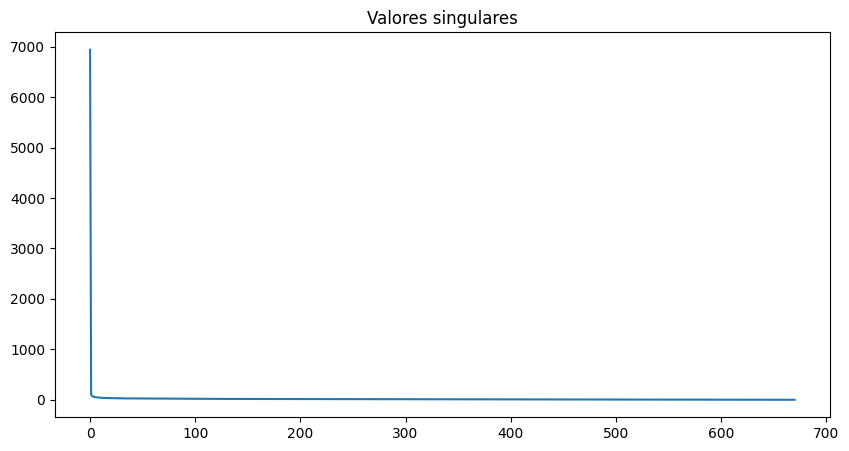

In [31]:
u, s, v = svd(A)

plt.figure(figsize=(10, 5))
plt.plot(s)
plt.title('Valores singulares')
plt.show()


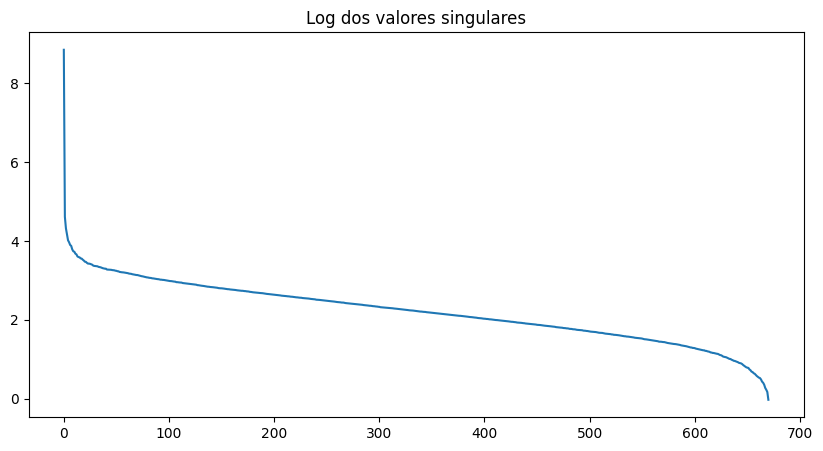

In [32]:
# Aplicando log para visualizar melhor
plt.figure(figsize=(10, 5))
plt.plot(np.log(s))
plt.title('Log dos valores singulares')
plt.show()


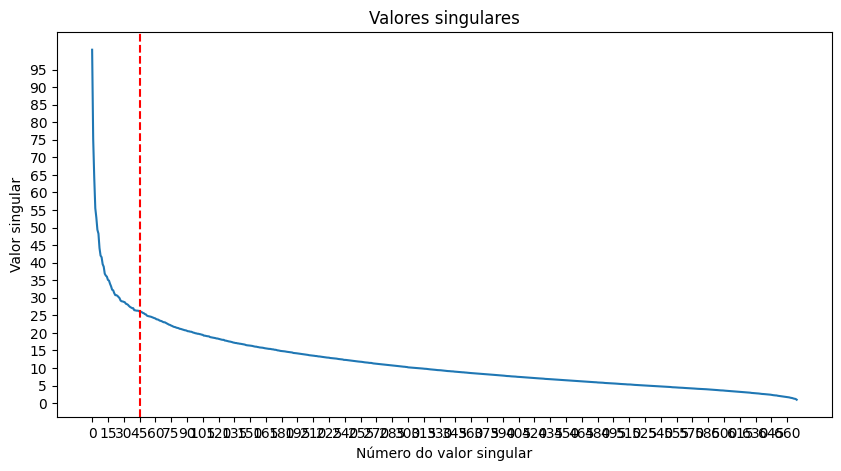

In [66]:

plt.figure(figsize=(10, 5))
plt.plot(s[1:]) # Ignora o primeiro valor singular, pois ele é muito maior que os outros
plt.xticks(range(0, len(s)-1, 15))
plt.xlabel('Número do valor singular')
plt.ylabel('Valor singular')
plt.yticks(range(0, 100, 5))
# Plota uma linha horizontal para indicar o ponto de corte
# plt.axhline(y=30, color='r', linestyle='--')
# Plota uma linha vertical para indicar o ponto de corte
plt.axvline(x=45, color='r', linestyle='--')
plt.title('Valores singulares')
plt.show()


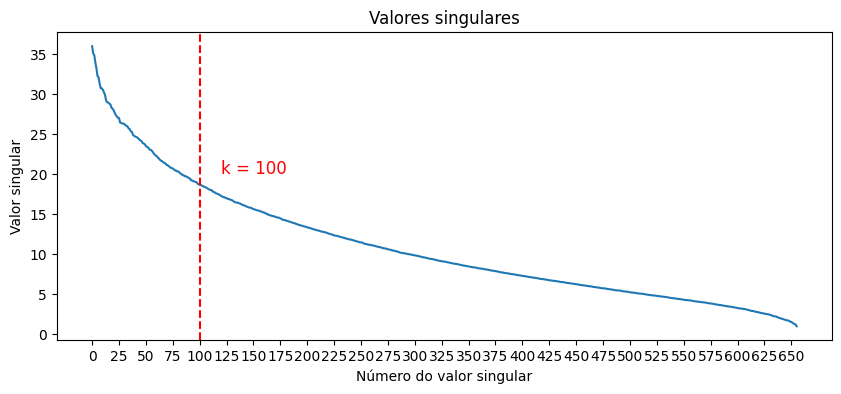

In [117]:
plt.figure(figsize=(10, 4))
plt.plot(s[15:]) # Ignora o primeiro valor singular, pois ele é muito maior que os outros
plt.xticks(range(0, len(s)-1, 25))
plt.xlabel('Número do valor singular')
plt.ylabel('Valor singular')
plt.text(120, 20, 'k = 100', fontsize=12, color='r')
plt.axvline(x=100, color='r', linestyle='--')
plt.title('Valores singulares')
plt.show()


# Utlizando K = 25

In [60]:
posicoes_selecionadas = []
valores_selecionados = []
valores_gerados = []
valores_simulados = []
porcentagem = 1

for i in range(0, 100):
    A_temp = A.copy()
    while True:
        # Seleciona uma posição aleatória na qual o valor não seja 2.8
        i = rd.randint(0, len(A) - 1)
        j = rd.randint(0, len(A[0]) - 1)
        if A_temp[i][j] != 2.8:
            break
    
    posicoes_selecionadas.append((i, j)) # Armazena a posição selecionada
    valores_selecionados.append(A_temp[i][j]) # Armazena o valor selecionado
    valor_gerado = max((rd.random() * rd.randint(1, 5)), 0.5) # Gera um valor de rating entre 0.5 e 5
    A_temp[i][j] = valor_gerado # Substitui o valor original pelo valor gerado
    valores_gerados.append(valor_gerado) # Armazena o valor gerado

    # Processo de remoção de ruído
    U, S, V = svd(A_temp)
    k = 25 # Valor encontrado com o método do cotovelo, analisando o gráfico dos valores singulares
    S[-k:] = k*[0] # Apaga os k últimos valores singulares
    A_simulado = U @ diagsvd(S, len(A), len(A[0])) @ V
    valores_simulados.append(A_simulado[i][j]) # Armazena o valor simulado
    print(porcentagem)
    porcentagem += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [62]:
erros = [valores_simulados[i] - valores_selecionados[i] for i in range(0, 100)]
erros_absolutos = [abs(valores_selecionados[i] - valores_simulados[i]) for i in range(0, 100)]
print("Erros: ", erros)
print("Erros absolutos: ", erros_absolutos)
sum(erros_absolutos)/len(erros_absolutos) # Média dos erros absolutos


Erros:  [1.921479987531057, -0.24678746181842648, -2.9968222718247515, -0.7016269150152974, -2.0003536769403585, -2.6693789965466728, -2.499873665276391, 0.9957587193102326, -0.3761107456144015, 0.38289496503771137, -3.964667763241934, 0.9701560832629146, -0.8577783551561948, -4.499661168302309, -3.0100625117506326, -2.502019200816643, 1.3175978512673545, -1.5755522108581101, -2.6602487416238594, -0.36832647466490664, -2.664665680649747, -2.6589458371592687, -2.280606818329744, -0.055160211666299475, -2.118234309409794, -3.3445794225745047, -0.49602088541698275, -2.034669465588408, -1.7889691842904445, -3.999607808034516, -2.2050772587742955, -0.6298331975076732, -3.612551146050863, 0.7590554212203715, 0.2439761302109864, -2.500009682126915, -0.49998196767943437, -3.141481961051449, -1.3503223508942708, 0.7621332607332554, -2.636039508174271, -3.944177562036878, -1.4993631986094869, -3.347947194727242, 1.2162479190278193, -0.7392032952295523, -4.424367161804377, 3.4863322724947077, -0.

2.189315520253665

In [78]:
# Convertendo as listas em um DataFrame
df = pd.DataFrame({'Posições selecionadas': posicoes_selecionadas, 'Valores selecionados': valores_selecionados, 'Valores gerados': valores_gerados, 'Valores simulados': valores_simulados, 'Erros': erros, 'Erros absolutos': erros_absolutos})
df.to_csv('data/erros_com_k_25.csv', index=False) # Salvando o DataFrame em um arquivo CSV

# Utlizando K = 100

In [79]:
posicoes_selecionadas = []
valores_selecionados = []
valores_gerados = []
valores_simulados = []
porcentagem = 1

for i in range(0, 100):
    A_temp = A.copy()
    while True:
        # Seleciona uma posição aleatória na qual o valor não seja 2.8
        i = rd.randint(0, len(A) - 1)
        j = rd.randint(0, len(A[0]) - 1)
        if A_temp[i][j] != 2.8:
            break
    
    posicoes_selecionadas.append((i, j)) # Armazena a posição selecionada
    valores_selecionados.append(A_temp[i][j]) # Armazena o valor selecionado
    valor_gerado = max((rd.random() * rd.randint(1, 5)), 0.5) # Gera um valor de rating entre 0.5 e 5
    A_temp[i][j] = valor_gerado # Substitui o valor original pelo valor gerado
    valores_gerados.append(valor_gerado) # Armazena o valor gerado

    # Processo de remoção de ruído
    U, S, V = svd(A_temp)
    k = 100 # Valor encontrado com o método do cotovelo, analisando o gráfico dos valores singulares
    S[-k:] = k*[0] # Apaga os k últimos valores singulares
    A_simulado = U @ diagsvd(S, len(A), len(A[0])) @ V
    valores_simulados.append(A_simulado[i][j]) # Armazena o valor simulado
    print(porcentagem)
    porcentagem += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [80]:
erros = [valores_simulados[i] - valores_selecionados[i] for i in range(0, 100)]
erros_absolutos = [abs(valores_selecionados[i] - valores_simulados[i]) for i in range(0, 100)]
print("Erros: ", erros)
print("Erros absolutos: ", erros_absolutos)
sum(erros_absolutos)/len(erros_absolutos) # Média dos erros absolutos

Erros:  [-2.1164402210174096, -2.5666098399180206, -2.849830185334447, -2.627934479676954, 1.7266682688436399, -3.420503462521036, -2.4927192269142813, -2.8806081776724217, -0.2543553536492036, -0.8939341496213831, -1.499619567835773, -3.7696079574467776, -2.0648946072143977, -3.4899772170245495, -0.9037009768106286, -2.509651012701341, -2.858218216505235, -1.03940613128627, -2.098455111962152, -2.3894710118637326, -0.5493608935164338, -1.2900312857933907, -1.950110797309427, -3.000485983010027, -2.4931086347981584, 2.2217554881123744, -3.4996249408092455, -1.3960586841282885, 0.40266741052428, -3.497923852677452, -2.5004388459829787, -1.4974078309434349, -0.0021675733662287477, -1.8862899529891735, -2.9981550521863674, -1.444892698026027, -3.5007575023924287, -1.6481401442777246, -0.8483143265925697, -4.07763294797694, -2.4984040292299468, -2.756658497639116, -2.452249303514646, 0.2567695583685492, -1.0405181773301386, -2.62269923901102, -2.5393592055813246, 0.928015544486136, -0.1780

2.1286181039643735

In [81]:
# Convertendo as listas em um DataFrame
df = pd.DataFrame({'Posições selecionadas': posicoes_selecionadas, 'Valores selecionados': valores_selecionados, 'Valores gerados': valores_gerados, 'Valores simulados': valores_simulados, 'Erros': erros, 'Erros absolutos': erros_absolutos})
df.to_csv('data/erros_com_k_100.csv', index=False) # Salvando o DataFrame em um arquivo CSV

# Testando com s[k:], k = 100

In [84]:
posicoes_selecionadas = []
valores_selecionados = []
valores_gerados = []
valores_simulados = []
porcentagem = 1

for i in range(0, 100):
    A_temp = A.copy()
    while True:
        # Seleciona uma posição aleatória na qual o valor não seja 2.8
        i = rd.randint(0, len(A) - 1)
        j = rd.randint(0, len(A[0]) - 1)
        if A_temp[i][j] != 2.8:
            break
    
    posicoes_selecionadas.append((i, j)) # Armazena a posição selecionada
    valores_selecionados.append(A_temp[i][j]) # Armazena o valor selecionado
    valor_gerado = max((rd.random() * rd.randint(1, 5)), 0.5) # Gera um valor de rating entre 0.5 e 5
    A_temp[i][j] = valor_gerado # Substitui o valor original pelo valor gerado
    valores_gerados.append(valor_gerado) # Armazena o valor gerado

    # Processo de remoção de ruído
    U, S, V = svd(A_temp)
    k = 100 # Valor encontrado com o método do cotovelo, analisando o gráfico dos valores singulares
    S[k:] = (len(S)-k)*[0] # Apaga os k últimos valores singulares
    A_simulado = U @ diagsvd(S, len(A), len(A[0])) @ V
    valores_simulados.append(A_simulado[i][j]) # Armazena o valor simulado
    print(porcentagem)
    porcentagem += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [91]:
erros = [valores_simulados[i] - valores_selecionados[i] for i in range(0, 100)]
erros_absolutos = [abs(valores_selecionados[i] - valores_simulados[i]) for i in range(0, 100)]
print("Erros: ", erros)
print("Erros absolutos: ", erros_absolutos)
sum(erros_absolutos)/len(erros_absolutos) # Média dos erros absolutos

Erros:  [-3.4714533793139335, -3.981874790971184, -2.977342441631548, -1.7420361978765964, -1.9854355369607721, -1.8000309888140995, 0.017385945741109854, 1.771334375156835, -0.3152671319775462, -1.4466376978241748, 1.2404471139613582, -0.8592243509460178, -2.5905477920922437, -0.5455393111979254, -2.985383189603338, -2.267884577309906, -1.8017341040995378, -1.0979128257265367, -3.0843462028873043, -1.4775681189139203, -2.3334179681182503, -1.3466796781212333, -2.3260753705386694, -0.9476367380949542, -2.142542798761642, -4.095280730921625, -2.7727835603605353, -2.2491781763819527, -0.9415286132438538, -3.804796699130711, -0.5189067251084283, -4.271226473537524, -4.3890543306312235, -3.1935088228974635, -0.10897458027037521, -0.7615914357276428, -2.820787455853692, -2.1413564992144654, -0.6399873676619716, 1.2646167475758476, -2.4251967933541634, -0.9513401714203522, -0.8205229889833836, 0.09603622100844955, -0.15903748478918667, -1.4028363122592045, -1.4602151188452903, -3.69286098031

1.834216101212044

In [86]:
# Convertendo as listas em um DataFrame
df = pd.DataFrame({'Posições selecionadas': posicoes_selecionadas, 'Valores selecionados': valores_selecionados, 'Valores gerados': valores_gerados, 'Valores simulados': valores_simulados, 'Erros': erros, 'Erros absolutos': erros_absolutos})
df.to_csv('data/erros_a_partir_k_100.csv', index=False) # Salvando o DataFrame em um arquivo CSV

# Testando com s[k:], k = 120

In [87]:
posicoes_selecionadas = []
valores_selecionados = []
valores_gerados = []
valores_simulados = []
porcentagem = 1

for i in range(0, 100):
    A_temp = A.copy()
    while True:
        # Seleciona uma posição aleatória na qual o valor não seja 2.8
        i = rd.randint(0, len(A) - 1)
        j = rd.randint(0, len(A[0]) - 1)
        if A_temp[i][j] != 2.8:
            break
    
    posicoes_selecionadas.append((i, j)) # Armazena a posição selecionada
    valores_selecionados.append(A_temp[i][j]) # Armazena o valor selecionado
    valor_gerado = max((rd.random() * rd.randint(1, 5)), 0.5) # Gera um valor de rating entre 0.5 e 5
    A_temp[i][j] = valor_gerado # Substitui o valor original pelo valor gerado
    valores_gerados.append(valor_gerado) # Armazena o valor gerado

    # Processo de remoção de ruído
    U, S, V = svd(A_temp)
    k = 120 # Valor encontrado com o método do cotovelo, analisando o gráfico dos valores singulares
    S[k:] = (len(S)-k)*[0] # Apaga os k últimos valores singulares
    A_simulado = U @ diagsvd(S, len(A), len(A[0])) @ V
    valores_simulados.append(A_simulado[i][j]) # Armazena o valor simulado
    print(porcentagem)
    porcentagem += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [88]:
erros = [valores_simulados[i] - valores_selecionados[i] for i in range(0, 100)]
erros_absolutos = [abs(valores_selecionados[i] - valores_simulados[i]) for i in range(0, 100)]
print("Erros: ", erros)
print("Erros absolutos: ", erros_absolutos)
sum(erros_absolutos)/len(erros_absolutos) # Média dos erros absolutos

Erros:  [-3.4714533793139335, -3.981874790971184, -2.977342441631548, -1.7420361978765964, -1.9854355369607721, -1.8000309888140995, 0.017385945741109854, 1.771334375156835, -0.3152671319775462, -1.4466376978241748, 1.2404471139613582, -0.8592243509460178, -2.5905477920922437, -0.5455393111979254, -2.985383189603338, -2.267884577309906, -1.8017341040995378, -1.0979128257265367, -3.0843462028873043, -1.4775681189139203, -2.3334179681182503, -1.3466796781212333, -2.3260753705386694, -0.9476367380949542, -2.142542798761642, -4.095280730921625, -2.7727835603605353, -2.2491781763819527, -0.9415286132438538, -3.804796699130711, -0.5189067251084283, -4.271226473537524, -4.3890543306312235, -3.1935088228974635, -0.10897458027037521, -0.7615914357276428, -2.820787455853692, -2.1413564992144654, -0.6399873676619716, 1.2646167475758476, -2.4251967933541634, -0.9513401714203522, -0.8205229889833836, 0.09603622100844955, -0.15903748478918667, -1.4028363122592045, -1.4602151188452903, -3.69286098031

1.834216101212044

In [89]:
# Convertendo as listas em um DataFrame
df = pd.DataFrame({'Posições selecionadas': posicoes_selecionadas, 'Valores selecionados': valores_selecionados, 'Valores gerados': valores_gerados, 'Valores simulados': valores_simulados, 'Erros': erros, 'Erros absolutos': erros_absolutos})
df.to_csv('data/erros_a_partir_k_120.csv', index=False) # Salvando o DataFrame em um arquivo CSV

# Analisando os dados e criando gráficos

In [92]:
df = pd.read_csv('data/erros_a_partir_k_100.csv')
df.head()


,Posições selecionadas,Valores selecionados,Valores gerados,Valores simulados,Erros,Erros absolutos
0,"(12, 326)",4.5,2.768683,2.896760,-1.603240,1.603240
1,"(212, 1422)",2.0,0.500000,0.707844,-1.292156,1.292156
2,"(561, 1359)",4.0,0.500000,2.373628,-1.626372,1.626372
3,"(614, 8510)",3.0,4.847620,3.208870,0.208870,0.208870
4,"(536, 1125)",4.0,0.702568,0.751268,-3.248732,3.248732


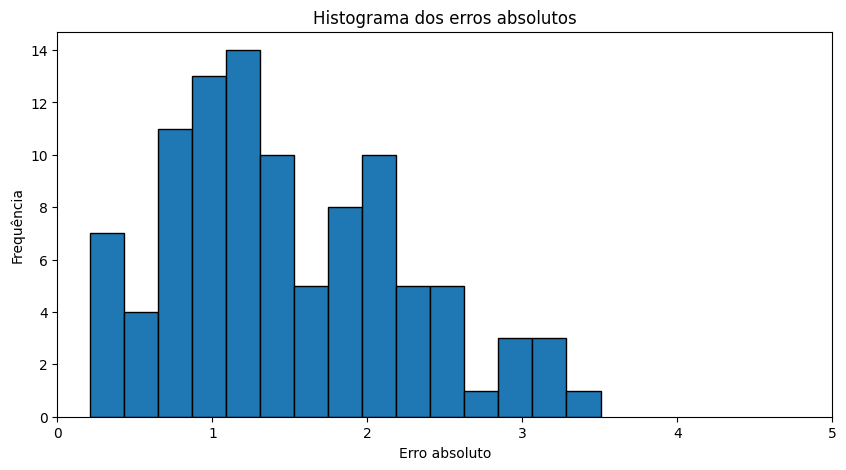

In [95]:
# grafico de barras com os erros absolutos variando de 0 a 5

plt.figure(figsize=(10, 5))
plt.hist(df['Erros absolutos'], bins=15, edgecolor='black')
plt.xticks(range(0, 6))
plt.xlabel('Erro absoluto')
plt.ylabel('Frequência')
plt.title('Histograma dos erros absolutos')
plt.show()



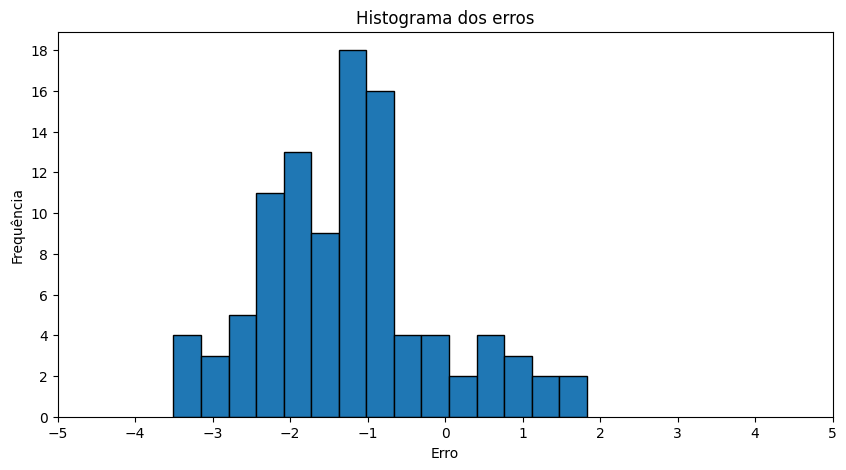

In [98]:
# grafico de barras com os erros variando de -5 a 5

plt.figure(figsize=(10, 5))
plt.hist(df['Erros'], bins=15, edgecolor='black')
plt.xticks(range(-5, 6))
plt.xlabel('Erro')
plt.yticks(range(0, 20, 2))
plt.ylabel('Frequência')
plt.title('Histograma dos erros') 
plt.show()

In [115]:
# valor médio de erro e de erro absoluto
erro_medio = df["Erros"].mean()
print("Erro médio: ", erro_medio)
erro_absoluto_medio = df["Erros absolutos"].mean()
print("Erro absoluto médio: ", erro_absoluto_medio)

Erro médio:  -1.2443679688537177
Erro absoluto médio:  1.4830517467382358
